In [1]:
# import required libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px 
import plotly.graph_objects as go
from datetime import datetime

import missingno as msno  

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

import warnings
warnings.filterwarnings("ignore")

plt.style.use("bmh") 

sns.set_style('darkgrid') 

np.set_printoptions(suppress=True, precision=4) 
pd.set_option('display.float_format','{:.4f}'.format)


In [2]:
customers = pd.read_csv(r"C:\Users\abboj\OneDrive\Documents\Innomatics\Data Analysis\Datasets\E-Commerce\olist_customers_dataset.csv")
sellers = pd.read_csv(r"C:\Users\abboj\OneDrive\Documents\Innomatics\Data Analysis\Datasets\E-Commerce\olist_sellers_dataset.csv") 
order_reviews = pd.read_csv(r"C:\Users\abboj\OneDrive\Documents\Innomatics\Data Analysis\Datasets\E-Commerce\olist_order_reviews_dataset.csv") 
order_items = pd.read_csv(r"C:\Users\abboj\OneDrive\Documents\Innomatics\Data Analysis\Datasets\E-Commerce\olist_order_items_dataset.csv") 
products = pd.read_csv(r"C:\Users\abboj\OneDrive\Documents\Innomatics\Data Analysis\Datasets\E-Commerce\olist_products_dataset.csv") 
geolocation = pd.read_csv(r"C:\Users\abboj\OneDrive\Documents\Innomatics\Data Analysis\Datasets\E-Commerce\olist_geolocation_dataset.csv") 
product_category = pd.read_csv(r"C:\Users\abboj\OneDrive\Documents\Innomatics\Data Analysis\Datasets\E-Commerce\product_category_name_translation.csv") 
orders = pd.read_csv(r"C:\Users\abboj\OneDrive\Documents\Innomatics\Data Analysis\Datasets\E-Commerce\olist_orders_dataset.csv") 
order_payments = pd.read_csv(r"C:\Users\abboj\OneDrive\Documents\Innomatics\Data Analysis\Datasets\E-Commerce\olist_order_payments_dataset.csv")

### Customer Dataset

In [3]:
customers.head() 
customers.info()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [99]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

**Observation :** 
- No missing values detected.
- Each row represent the unique customer
- customer_id is a primary key that connects which orders.
- customer_unique_id groups the customers across multiple orders simply repeat buyers
- includes customer_city, customer_state and customer_zip_code_prefix for geolocation purposes.

### Orders Dataset

In [4]:
orders.head() 
orders.info() 
orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [5]:
orders.order_status.value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

**Observation :** 
- It serves as main dataset that links other tables.
- order_id is the primary key and links to order_items, order_payments, orrder_reviews and customers.
- order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, etc. are objects that must be converted into datetime. 

### Order Items Dataset

In [6]:
order_items.head() 
order_items.info() 
order_items.describe()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9000,13.2900
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9000,19.9300
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0000,17.8700
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.9900,12.7900
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.9000,18.1400


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


,order_item_id,price,freight_value
count,112650.0000,112650.0000,112650.0000
mean,1.1978,120.6537,19.9903
std,0.7051,183.6339,15.8064
min,1.0000,0.8500,0.0000
25%,1.0000,39.9000,13.0800
50%,1.0000,74.9900,16.2600
75%,1.0000,134.9000,21.1500
max,21.0000,6735.0000,409.6800


In [100]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

**Observation :** 
- No missing values are detected.
- Each row represents an individual product item in the order.
* - An Order can have multiple products.
- * order_id ---> linkes to orders
  * product_id ---> linkes to products
  * seller_id ---> linkes to the sellers.

### Order Payments Dataset

In [7]:
order_payments.head() 
order_payments.info() 
order_payments.describe()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.3300
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.3900
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.7100
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.7800
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.4500


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


,payment_sequential,payment_installments,payment_value
count,103886.0000,103886.0000,103886.0000
mean,1.0927,2.8533,154.1004
std,0.7066,2.6871,217.4941
min,1.0000,0.0000,0.0000
25%,1.0000,1.0000,56.7900
50%,1.0000,1.0000,100.0000
75%,1.0000,4.0000,171.8375
max,29.0000,24.0000,13664.0800


In [102]:
order_payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

**Observation :** 
- No missing values found.
- Each row shows how a specific order was paid.
- * order_id links to the orders

### Order Reviews Dataset

In [8]:
order_reviews.head() 
order_reviews.info() 
order_reviews.describe()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


,review_score
count,99224.0000
mean,4.0864
std,1.3476
min,1.0000
25%,4.0000
50%,5.0000
75%,5.0000
max,5.0000


In [103]:
order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87122
review_comment_message     57888
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [105]:
order_reviews.dropna(axis=1, how='any').shape

(98673, 5)

**Observation :** 
- Each row corresponds exactly one review per order.
- review_score ranges from 1 to 5.
- review_comment_title and review_comment_message have null values so i choose to drop the columns beacause it does not contribute any analysis during EDA.
- Review timestamps (review_creation_date, review_answer_timestamp) are stored as objects and will need datetime conversion for time series analysis.

### Products Dataset

In [9]:
products.head() 
products.info() 
products.describe()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0000,287.0000,1.0000,225.0000,16.0000,10.0000,14.0000
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0000,276.0000,1.0000,1000.0000,30.0000,18.0000,20.0000
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0000,250.0000,1.0000,154.0000,18.0000,9.0000,15.0000
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0000,261.0000,1.0000,371.0000,26.0000,4.0000,26.0000
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0000,402.0000,4.0000,625.0000,20.0000,17.0000,13.0000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.0000,32341.0000,32341.0000,32949.0000,32949.0000,32949.0000,32949.0000
mean,48.4769,771.4953,2.1890,2276.4725,30.8151,16.9377,23.1967
std,10.2457,635.1152,1.7368,4282.0387,16.9145,13.6376,12.0790
min,5.0000,4.0000,1.0000,0.0000,7.0000,2.0000,6.0000
25%,42.0000,339.0000,1.0000,300.0000,18.0000,8.0000,15.0000
50%,51.0000,595.0000,1.0000,700.0000,25.0000,13.0000,20.0000
75%,57.0000,972.0000,3.0000,1900.0000,38.0000,21.0000,30.0000
max,76.0000,3992.0000,20.0000,40425.0000,105.0000,105.0000,118.0000


In [106]:
products.isna().sum()

product_id                    0
product_category_name         0
product_name_length           0
product_description_length    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

**Observation :** 
- The dataset contains product identifiers, product categories (in Portuguese), and physical attributes such as length, height, width, and weight. 

### Product Category Dataset

In [10]:
product_category.head() 
product_category.info()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


**Observation :** 
- The dataset contains two columns: the original portuguese category names and their English translations.


### Sellers Dataset

In [11]:
sellers.head() 
sellers.info()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


**Observation :** 
- Each rows represents the unique seller identified by the seller_id.
- There is no missing values.

### Geolocation Dataset

In [12]:
geolocation.head() 
geolocation.info() 
geolocation.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.5456,-46.6393,sao paulo,SP
1,1046,-23.5461,-46.6448,sao paulo,SP
2,1046,-23.5461,-46.6430,sao paulo,SP
3,1041,-23.5444,-46.6395,sao paulo,SP
4,1035,-23.5416,-46.6416,sao paulo,SP


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1000163.0000,1000163.0000,1000163.0000
mean,36574.1665,-21.1762,-46.3905
std,30549.3357,5.7159,4.2697
min,1001.0000,-36.6054,-101.4668
25%,11075.0000,-23.6035,-48.5732
50%,26530.0000,-22.9194,-46.6379
75%,63504.0000,-19.9796,-43.7677
max,99990.0000,45.0659,121.1054


**Observation :** 
- Each zip code prefix is associated with one city and one state.
- This dataset enables mapping customer and seller locations geographically.

### Cleaning the Data

In [13]:
## on orders Dataset 
orders.shape

(99441, 8)

In [14]:
cols = ['order_purchase_timestamp', "order_approved_at", 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'] 

for col in cols:
    orders[col] = pd.to_datetime(orders[col], errors='coerce')

In [15]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [16]:
invalid_orders = orders[(orders["order_approved_at"] < orders["order_purchase_timestamp"])
      | (orders["order_delivered_carrier_date"] < orders["order_approved_at"]) 
      | (orders["order_delivered_customer_date"] < orders["order_delivered_carrier_date"]) 
      | (orders["order_estimated_delivery_date"] < orders["order_purchase_timestamp"])]

In [17]:
invalid_orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1382 entries, 15 to 99406
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       1382 non-null   object        
 1   customer_id                    1382 non-null   object        
 2   order_status                   1382 non-null   object        
 3   order_purchase_timestamp       1382 non-null   datetime64[ns]
 4   order_approved_at              1382 non-null   datetime64[ns]
 5   order_delivered_carrier_date   1382 non-null   datetime64[ns]
 6   order_delivered_customer_date  1373 non-null   datetime64[ns]
 7   order_estimated_delivery_date  1382 non-null   datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 97.2+ KB


In [18]:
invalid_orders.index

Index([   15,    64,   199,   210,   415,   481,   483,   585,   615,   817,
       ...
       98884, 98942, 98968, 99023, 99086, 99091, 99230, 99266, 99377, 99406],
      dtype='int64', length=1382)

In [19]:
orders = orders.drop(invalid_orders.index).reset_index(drop=True)

In [20]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98059 entries, 0 to 98058
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       98059 non-null  object        
 1   customer_id                    98059 non-null  object        
 2   order_status                   98059 non-null  object        
 3   order_purchase_timestamp       98059 non-null  datetime64[ns]
 4   order_approved_at              97899 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96276 non-null  datetime64[ns]
 6   order_delivered_customer_date  95103 non-null  datetime64[ns]
 7   order_estimated_delivery_date  98059 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.0+ MB


In [21]:
## order_items dataset 

order_items.shape

(112650, 7)

**Observation :** 
- Converted order timestamp columns to datetime.
-  Removed orders with invalid timelines (eg., delivery before purchase).
-  Reset the index after cleaning.

**Result:** Removed 1382 invalid orders; 98059 valid orders remain.

In [22]:
order_items = order_items[(order_items["price"] > 0.0) | (order_items["freight_value"] >= 0.0)] 

In [23]:
order_items["shipping_limit_date"] = pd.to_datetime(order_items["shipping_limit_date"], errors="coerce")

In [24]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Observation :** 
- Removed rows with non-positive prices or negative freight values.

In [25]:
order_payments["payment_type"].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

In [26]:
undefined_orders = order_payments[order_payments["payment_type"] == "not_defined"] 
undefined_orders

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0000
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0000
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0000


In [27]:
order_payments = order_payments.drop(undefined_orders.index).reset_index(drop=True)

In [107]:
order_payments.shape[0]

103883

**Observation :** 
- Identified not_defined payments, which only occur in canceled/unapproved orders

**Result :** Removed 3 invalid payments; 103883 valid payments remain.

In [28]:
## Order_reviews 

cols = ["review_creation_date", "review_answer_timestamp"] 

for col in cols:
    order_reviews[col] = pd.to_datetime(order_reviews[col], errors='coerce')

In [29]:
order_reviews.shape

(99224, 7)

In [30]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [31]:
order_reviews["order_id"].isna().sum()

0

In [32]:
order_reviews["order_id"].duplicated().sum()

551

In [33]:
dup_rows = order_reviews[order_reviews["order_id"].duplicated()]

In [34]:
order_reviews = order_reviews.drop(dup_rows.index).reset_index(drop=Tru)

**Observation :** 
- 

In [35]:
# products 

products.shape

(32951, 9)

In [36]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [37]:
products.rename(columns={
    "product_name_lenght" : "product_name_length",
    "product_description_lenght" : "product_description_length"
}, inplace=True)

In [38]:
missing_cat_names = products[products["product_category_name"].isna()] 

In [39]:
products = products.drop(missing_cat_names.index).reset_index(drop=True) 
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32341 entries, 0 to 32340
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32341 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_length         32341 non-null  float64
 3   product_description_length  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.2+ MB


In [40]:
products.isna().sum()

product_id                    0
product_category_name         0
product_name_length           0
product_description_length    0
product_photos_qty            0
product_weight_g              1
product_length_cm             1
product_height_cm             1
product_width_cm              1
dtype: int64

In [41]:
cols = ["product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"] 

for col in cols: 
    median_val = products[col].median() 
    products.fillna({col:median_val}, inplace=True)

In [42]:
products = products[(products["product_weight_g"] > 0)] 
products = products[(products['product_length_cm'] > 0) & 
                    (products['product_height_cm'] > 0) & 
                    (products['product_width_cm'] > 0)]
products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32337 entries, 0 to 32340
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32337 non-null  object 
 1   product_category_name       32337 non-null  object 
 2   product_name_length         32337 non-null  float64
 3   product_description_length  32337 non-null  float64
 4   product_photos_qty          32337 non-null  float64
 5   product_weight_g            32337 non-null  float64
 6   product_length_cm           32337 non-null  float64
 7   product_height_cm           32337 non-null  float64
 8   product_width_cm            32337 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


In [43]:
product_names_spa = products['product_category_name'].unique() 

**Observation :** 
- Fixed column name typos (lenght → length).
- Dropped products with missing category names (~1.85% of rows).
- Filled missing values in weight and dimensions with the median of each column.

In [44]:
## product category 

product_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [45]:
# Re-check for any missing categories
missing_names = set(product_names_spa) - set(product_category['product_category_name'])
print("Missing categories:", missing_names)

Missing categories: {'portateis_cozinha_e_preparadores_de_alimentos', 'pc_gamer'}


In [46]:
## seller dataset 

sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [47]:
sellers.seller_city

0                campinas
1              mogi guacu
2          rio de janeiro
3               sao paulo
4       braganca paulista
              ...        
3090              sarandi
3091              palhoca
3092            sao paulo
3093              pelotas
3094              taubate
Name: seller_city, Length: 3095, dtype: object

In [48]:
single_entry_cities = sellers['seller_city'].value_counts()[sellers['seller_city'].value_counts() == 1]
sorted(single_entry_cities.index)

['04482255',
 'abadia de goias',
 'afonso claudio',
 'aguas claras df',
 'alambari',
 'almirante tamandare',
 'alvares machado',
 'alvorada',
 'ampere',
 'andira-pr',
 'angra dos reis',
 'angra dos reis rj',
 'ao bernardo do campo',
 'aparecida',
 'aparecida de goiania',
 'aperibe',
 'aracaju',
 'araquari',
 'ararangua',
 'arinos',
 "arraial d'ajuda (porto seguro)",
 'arvorezinha',
 'auriflama',
 'auriflama/sp',
 'avare',
 'bage',
 'bahia',
 'balenario camboriu',
 'bandeirantes',
 'barbacena',
 'barbacena/ minas gerais',
 'barra velha',
 'barrinha',
 'barro alto',
 'bebedouro',
 'belo horizont',
 'bertioga',
 'bocaiuva do sul',
 'bofete',
 'bom jardim',
 'bom jesus dos perdoes',
 'bombinhas',
 'bonfinopolis de minas',
 'braco do norte',
 'brasilia df',
 'brejao',
 'brotas',
 'buritama',
 'cacador',
 'cachoeira do sul',
 'caieiras',
 'california',
 'camanducaia',
 'camboriu',
 'campanha',
 'campina das missoes',
 'campina grande',
 'campo do meio',
 'campo magro',
 'campo mourao',
 'cam

In [49]:
# orders + customers  
orders_customers = orders.merge(customers, on="customer_id", how="left") 
#orders_customers 

# Add Payments 
orders_customers_payments = orders_customers.merge(order_payments, on="order_id", how="left") 
#orders_customers_payments

# Add Reviews 
orders_customers_payments_reviews = orders_customers_payments.merge(order_reviews,
                                                                    on="order_id", how="left") 
#orders_customers_payments_reviews 

# Add Order Items 
order_full = orders_customers_payments_reviews.merge(order_items, on="order_id", how="left") 
#order_full 

# add products info 
order_full = order_full.merge(products, on="product_id", how="left") 
#order_full  

# Add seller info 
order_full = order_full.merge(sellers, on="seller_id", how="left")
# order_full.head()  

order_full = order_full.merge(product_category, on="product_category_name", how = "left") 
order_full.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0000,4.0000,500.0000,19.0000,8.0000,13.0000,9350.0000,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0000,4.0000,500.0000,19.0000,8.0000,13.0000,9350.0000,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0000,4.0000,500.0000,19.0000,8.0000,13.0000,9350.0000,maua,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,178.0000,1.0000,400.0000,19.0000,13.0000,19.0000,31570.0000,belo horizonte,SP,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,232.0000,1.0000,420.0000,24.0000,19.0000,21.0000,14840.0000,guariba,SP,auto


In [50]:
customers_geo = customers.merge(geolocation, how="left", 
                                left_on="customer_zip_code_prefix",
                                right_on="geolocation_zip_code_prefix") 
customers_geo.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0000,-20.5099,-47.3979,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0000,-20.4974,-47.3992,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0000,-20.5105,-47.3996,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0000,-20.4809,-47.3942,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0000,-20.5154,-47.3982,franca,SP


In [51]:
customers_geo.isna().sum()

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
geolocation_zip_code_prefix    278
geolocation_lat                278
geolocation_lng                278
geolocation_city               278
geolocation_state              278
dtype: int64

In [52]:
order_full.shape

(116775, 40)

In [53]:
order_full.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   176
order_delivered_carrier_date       2074
order_delivered_customer_date      3388
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
payment_sequential                    6
payment_type                          6
payment_installments                  6
payment_value                         6
review_id                           987
review_score                        987
review_comment_title             103326
review_comment_message            67475
review_creation_date                987
review_answer_timestamp             987
order_item_id                       830
product_id                          830
seller_id                           830


In [54]:
round((order_full.isna().sum() / len(order_full)) * 100, 3).sort_values(ascending=False)

review_comment_title            88.4830
review_comment_message          57.7820
order_delivered_customer_date    2.9010
product_category_name_english    2.1840
product_width_cm                 2.1620
product_height_cm                2.1620
product_length_cm                2.1620
product_weight_g                 2.1620
product_photos_qty               2.1620
product_description_length       2.1620
product_name_length              2.1620
product_category_name            2.1620
order_delivered_carrier_date     1.7760
review_id                        0.8450
review_answer_timestamp          0.8450
review_score                     0.8450
review_creation_date             0.8450
seller_state                     0.7110
order_item_id                    0.7110
product_id                       0.7110
seller_id                        0.7110
shipping_limit_date              0.7110
price                            0.7110
freight_value                    0.7110
seller_city                      0.7110


In [55]:
order_full.duplicated().sum()

0

In [56]:
# unique sellers 
order_full["seller_id"].nunique() 

# unique products 
order_full["product_category_name_english"].nunique()  

order_full["product_category_name_english"].value_counts().head()

3084

71

product_category_name_english
bed_bath_table           11635
health_beauty             9802
sports_leisure            8845
furniture_decor           8635
computers_accessories     7982
Name: count, dtype: int64

In [57]:
order_full.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value,review_score,...,price,freight_value,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix
count,116775,116599,114701,113387,116775,116775.0000,116769.0000,116769.0000,116769.0000,115788.0000,...,115945.0000,115945.0000,114250.0000,114250.0000,114250.0000,114250.0000,114250.0000,114250.0000,114250.0000,115945.0000
mean,2017-12-28 10:17:52.836805888,2017-12-28 19:48:36.134984192,2018-01-02 00:27:20.294129920,2018-01-11 13:45:10.740843264,2018-01-21 06:58:58.312138752,35018.5027,1.0944,2.9385,172.9996,4.0147,...,120.9530,20.0379,48.7591,787.0282,2.2066,2123.6741,30.3317,16.6735,23.1185,24439.4705
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,1004.0000,1.0000,0.0000,0.0000,1.0000,...,0.8500,0.0000,5.0000,4.0000,1.0000,2.0000,7.0000,2.0000,6.0000,1001.0000
25%,2017-09-09 19:59:16,2017-09-10 13:05:10,2017-09-14 00:57:56,2017-09-22 13:54:58,2017-09-29 00:00:00,11310.0000,1.0000,1.0000,60.8500,4.0000,...,39.9000,13.0800,42.0000,347.0000,1.0000,300.0000,18.0000,8.0000,15.0000,6440.0000
50%,2018-01-15 20:27:50,2018-01-16 06:54:37,2018-01-19 22:29:10,2018-01-30 20:58:59,2018-02-09 00:00:00,24240.0000,1.0000,2.0000,108.1700,5.0000,...,74.9000,16.2800,52.0000,602.0000,1.0000,700.0000,25.0000,13.0000,20.0000,13660.0000
75%,2018-05-02 11:07:03,2018-05-02 17:31:52,2018-05-04 15:20:00,2018-05-14 15:01:19.500000,2018-05-24 00:00:00,58416.0000,1.0000,4.0000,189.1900,5.0000,...,134.9000,21.1800,57.0000,985.0000,3.0000,1800.0000,38.0000,20.0000,30.0000,27930.0000
max,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,99990.0000,29.0000,24.0000,13664.0800,5.0000,...,6735.0000,409.6800,76.0000,3992.0000,20.0000,40425.0000,105.0000,105.0000,118.0000,99730.0000
std,NaN,NaN,NaN,NaN,NaN,29804.1692,0.7306,2.7756,269.1640,1.4009,...,184.8556,15.8700,10.0322,653.3643,1.7193,3797.4167,16.2379,13.4962,11.7654,27562.7303


In [58]:
order_full.drop(columns=["customer_id", 
                       "order_id", "order_item_id", 
                       "product_id",
                       "review_id", "product_category_name"], inplace=True)

In [59]:
order_full.head()

,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,...,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,...,268.0000,4.0000,500.0000,19.0000,8.0000,13.0000,9350.0000,maua,SP,housewares
1,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,...,268.0000,4.0000,500.0000,19.0000,8.0000,13.0000,9350.0000,maua,SP,housewares
2,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,...,268.0000,4.0000,500.0000,19.0000,8.0000,13.0000,9350.0000,maua,SP,housewares
3,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,...,178.0000,1.0000,400.0000,19.0000,13.0000,19.0000,31570.0000,belo horizonte,SP,perfumery
4,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,...,232.0000,1.0000,420.0000,24.0000,19.0000,21.0000,14840.0000,guariba,SP,auto


**What is the distribution of order status (delivered, shipped, canceled, etc.)?**

In [60]:
order_full["order_status"].value_counts()

order_status
delivered      113388
shipped          1236
canceled          745
unavailable       650
processing        375
invoiced          373
created             5
approved            3
Name: count, dtype: int64

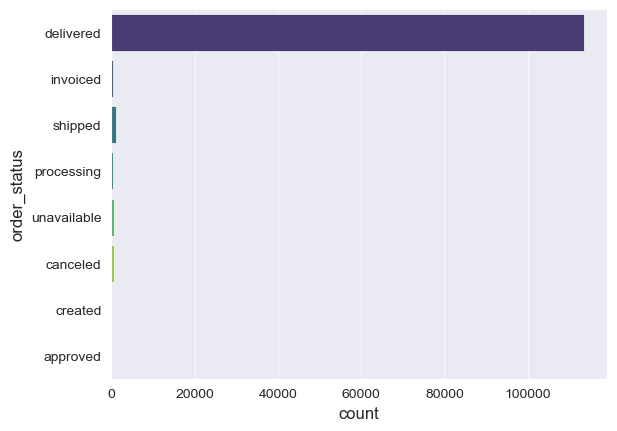

In [61]:
sns.countplot(order_full.order_status, palette=sns.color_palette("viridis")); 

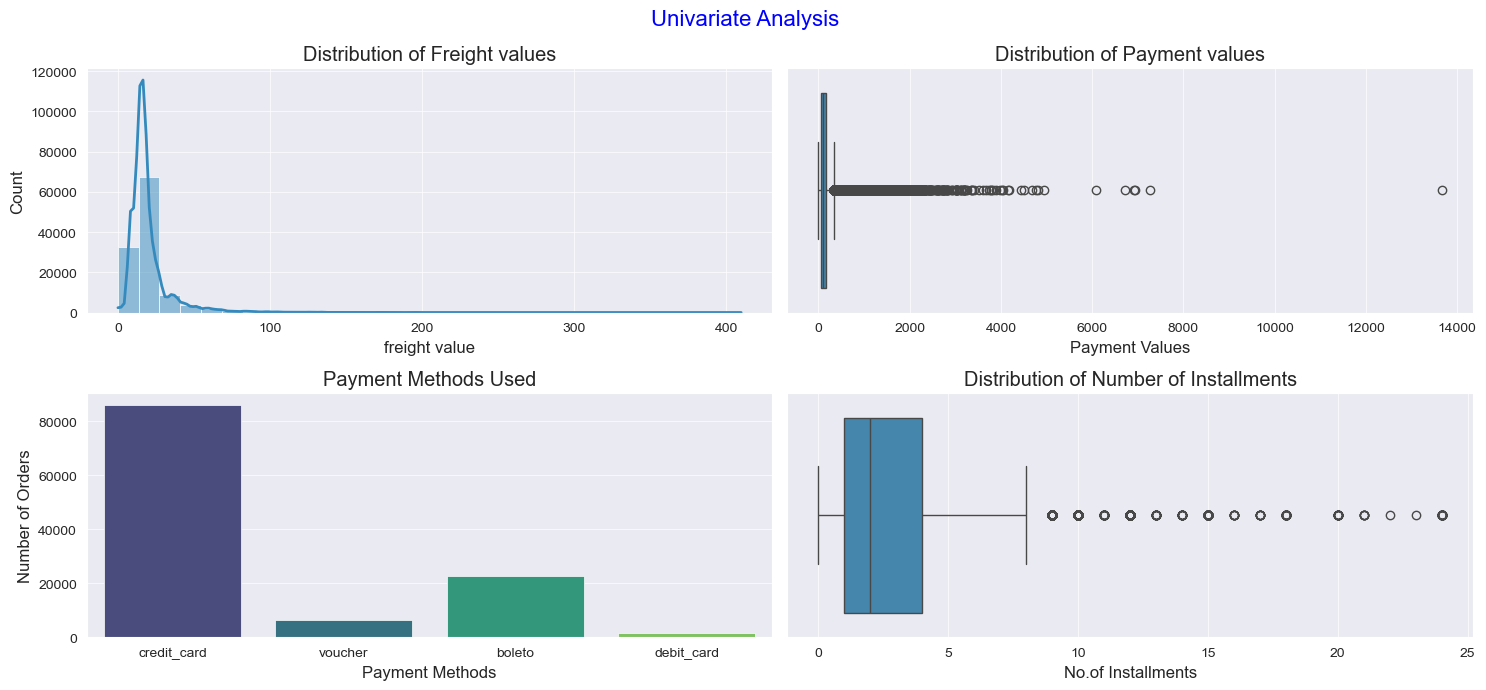

In [62]:
fig = plt.figure(figsize=(15,7))
gs = fig.add_gridspec(2,2)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])

plt.suptitle("Univariate Analysis", color="b", fontsize=16)

sns.histplot(order_full['freight_value'], bins=30, kde=True, ax=ax1);
ax1.set_title("Distribution of Freight values")
ax1.set_xlabel("freight value")

sns.boxplot(x= order_payments["payment_value"], ax=ax2);
ax2.set_title("Distribution of Payment values")
ax2.set_xlabel("Payment Values")

sns.countplot(data=order_full, x="payment_type", palette="viridis", ax=ax3);
ax3.set_title("Payment Methods Used")
ax3.set_xlabel("Payment Methods")
ax3.set_ylabel("Number of Orders") 

sns.boxplot(data=order_full, x="payment_installments", ax=ax4);
ax4.set_title("Distribution of Number of Installments") 
ax4.set_xlabel("No.of Installments")

plt.tight_layout()
plt.show();

**How many orders are placed per year, month, or day of the week?**

In [63]:
order_full["order_purchase_timestamp"].max() 
order_full["order_purchase_timestamp"].min()

Timestamp('2018-10-17 17:30:18')

Timestamp('2016-09-04 21:15:19')

In [64]:
order_full["pur_year"] = order_full["order_purchase_timestamp"].dt.year  
order_full["pur_month"] = order_full["order_purchase_timestamp"].dt.month
order_full["pur_day"] = order_full["order_purchase_timestamp"].dt.day_name()

In [65]:
orders_per_year = order_full["pur_year"].value_counts().sort_index() 
orders_per_year

pur_year
2016      400
2017    53938
2018    62437
Name: count, dtype: int64

In [66]:
order_full["pur_hour"] = order_full["order_purchase_timestamp"].dt.hour

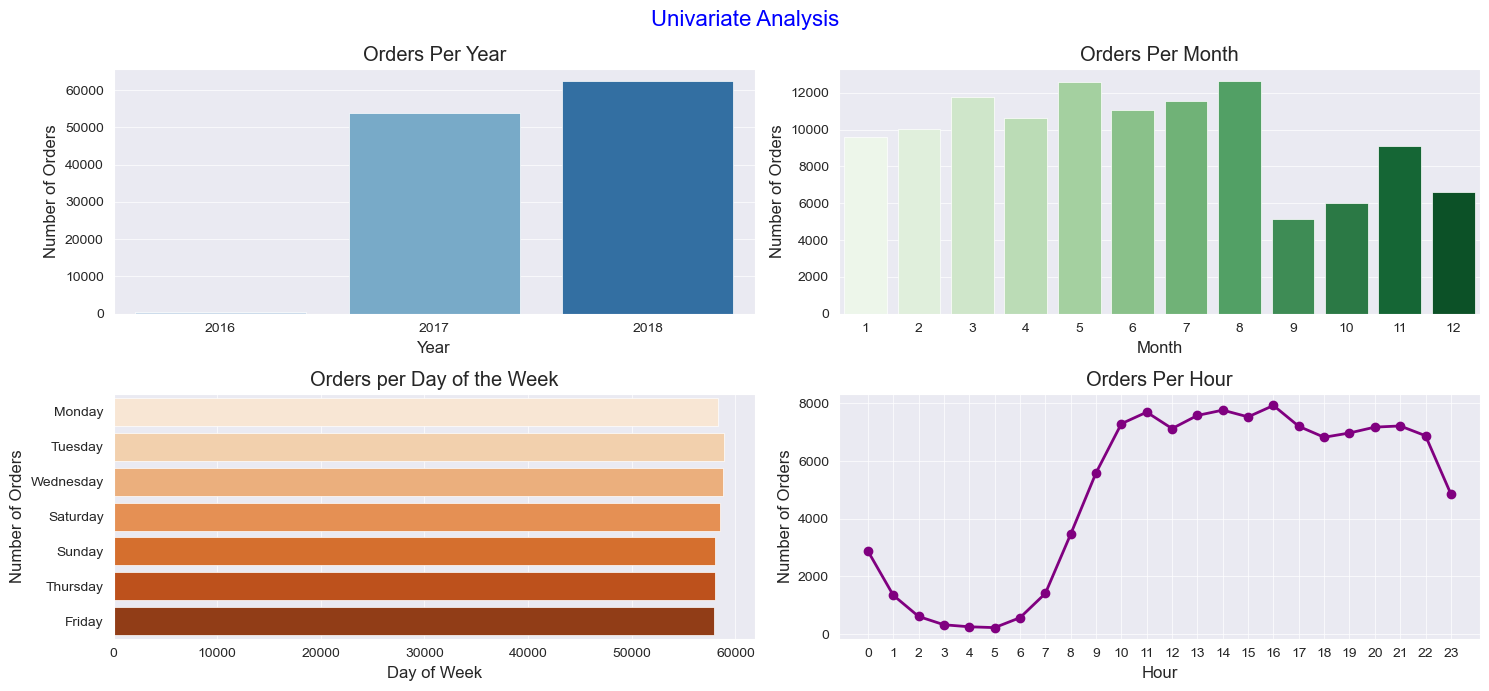

In [67]:
fig = plt.figure(figsize=(15,7))
gs = fig.add_gridspec(2,2)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])

plt.suptitle("Univariate Analysis", color="b", fontsize=16)

# Orders per Year
sns.countplot(x="pur_year", data=order_full, palette="Blues", ax=ax1)
ax1.set_title("Orders Per Year")
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Orders")

# Orders per Month
sns.countplot(x="pur_month", data=order_full, palette="Greens", ax=ax2)
ax2.set_title("Orders Per Month")
ax2.set_xlabel("Month")
ax2.set_ylabel("Number of Orders")

# Orders per Day of Week
sns.barplot(order_full.pur_day, ci=False, palette="Oranges", ax=ax3);
ax3.set_title("Orders per Day of the Week")
ax3.set_xlabel("Day of Week")
ax3.set_ylabel("Number of Orders") 

orders_per_hour = order_full.groupby("pur_hour").size().reset_index(name="num_orders")
ax4.plot(orders_per_hour["pur_hour"], orders_per_hour["num_orders"], marker="o", color="purple")  
ax4.set_title("Orders Per Hour") 
ax4.set_xticks(range(0,24))  
ax4.set_xlabel("Hour")
ax4.set_ylabel("Number of Orders")

plt.tight_layout()
plt.show();

In [68]:
x = np.where(order_full["order_delivered_customer_date"] > order_full["order_estimated_delivery_date"], 
             "Late", "On Time") 
print(x[:10])

['On Time' 'On Time' 'On Time' 'On Time' 'On Time' 'On Time' 'On Time'
 'On Time' 'On Time' 'On Time']


In [69]:
order_full["delivery_status"] = x

In [70]:
order_full["delivey_time_days"] = (order_full["order_delivered_customer_date"] - order_full["order_purchase_timestamp"]).dt.days 

In [71]:
avg_delivey_time = order_full["delivey_time_days"].mean() 
avg_delivey_time

12.07965639799977

In [72]:
product_cat = order_full["product_category_name_english"].value_counts()[:10]

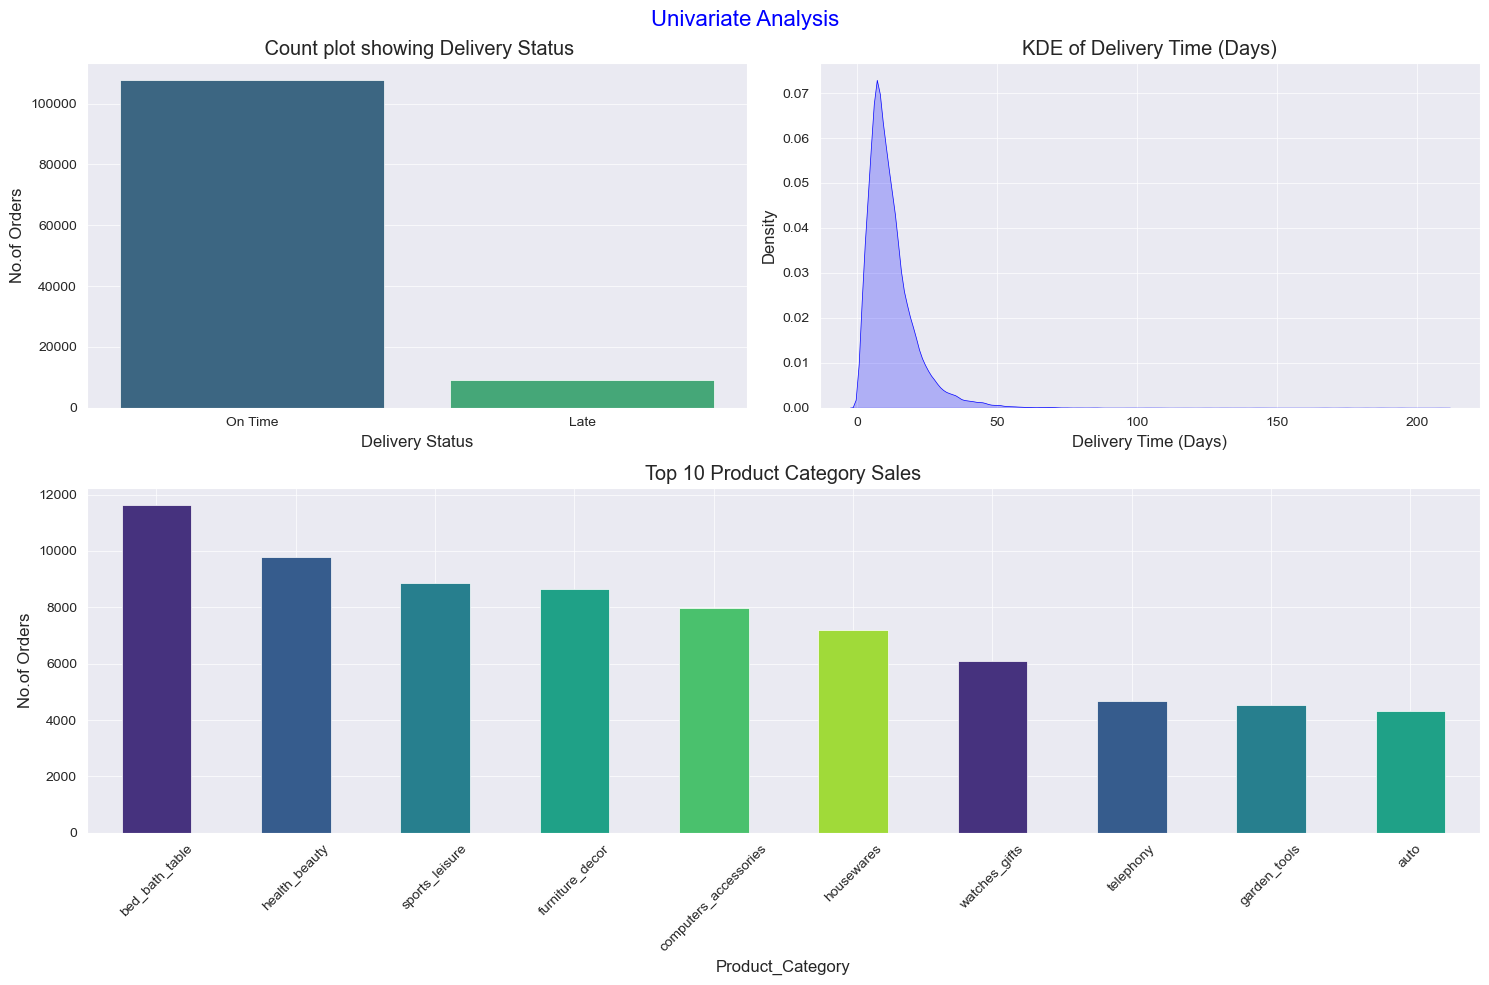

In [73]:
fig = plt.figure(figsize=(15,10))
gs = fig.add_gridspec(2,2)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1]) 
ax3 = fig.add_subplot(gs[1,:])

plt.suptitle("Univariate Analysis", color="b", fontsize=16)

sns.countplot(x="delivery_status", data=order_full, palette="viridis", ax=ax1)
ax1.set_title(" Count plot showing Delivery Status")
ax1.set_xlabel("Delivery Status")
ax1.set_ylabel("No.of Orders")

sns.kdeplot(data=order_full, x="delivey_time_days", fill=True, color="blue", ax=ax2)
ax2.set_title("KDE of Delivery Time (Days)")
ax2.set_xlabel("Delivery Time (Days)")
ax2.set_ylabel("Density") 

product_cat.plot(kind="bar", x="product_category_name_english", 
                 color=sns.color_palette("viridis"), ax=ax3) 
ax3.set_title("Top 10 Product Category Sales") 
ax3.set_xlabel("Product_Category") 
ax3.set_ylabel("No.of Orders") 
ax3.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show();

## Bivariate Analysis

In [74]:
payment_type_count = order_full.groupby("payment_type").agg(
    count=("price","count"),
    price=("price", "mean")
).reset_index() 
payment_type_count

,payment_type,count,price
0,boleto,22507,104.9569
1,credit_card,85589,126.5674
2,debit_card,1644,108.6814
3,voucher,6202,104.8119


In [75]:
monthy_trend = order_full.groupby(["pur_year", 
                                   "pur_month"])["payment_value"].sum().reset_index() 

In [76]:
orders_heatmap = order_full.groupby(["pur_day", "pur_hour"]).size().unstack(fill_value=0)
days_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"] 
orders_heatmap = orders_heatmap.reindex(days_order)

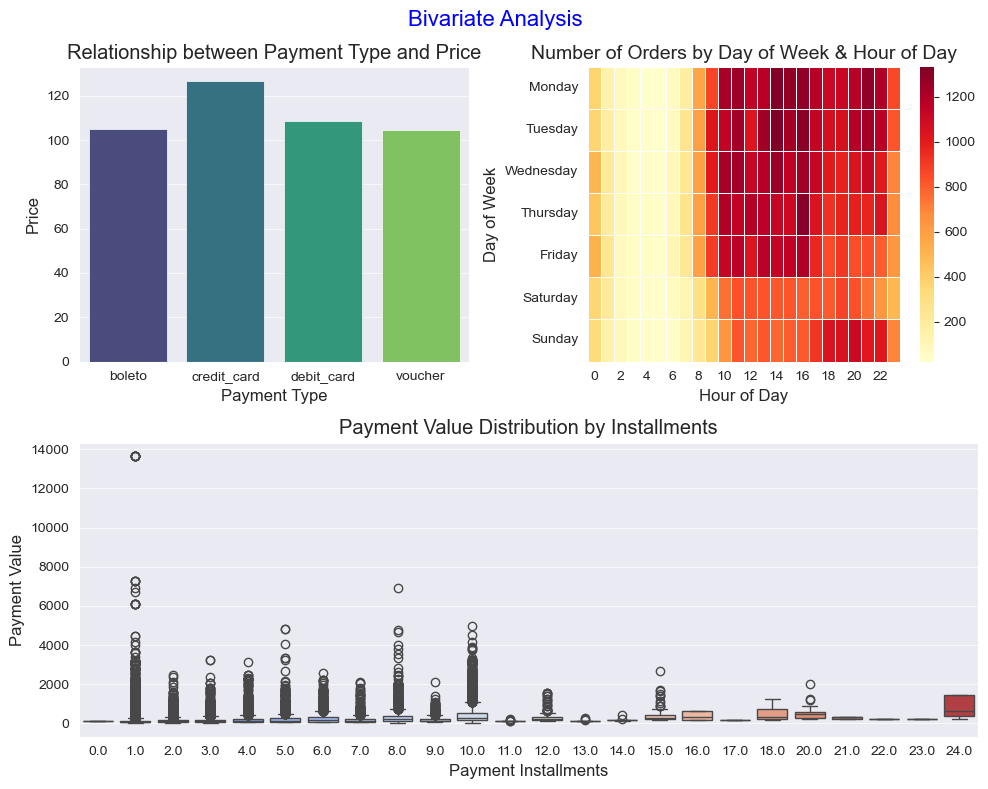

In [77]:
fig = plt.figure(figsize=(10,8))
gs = fig.add_gridspec(2,2)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1]) 
ax3 = fig.add_subplot(gs[1,:])

plt.suptitle("Bivariate Analysis", color="b", fontsize=16)

sns.barplot(data=payment_type_count, x="payment_type", y="price", palette="viridis", ax=ax1)
ax1.set_title("Relationship between Payment Type and Price")
ax1.set_xlabel("Payment Type")
ax1.set_ylabel("Price") 

sns.heatmap(orders_heatmap, cmap="YlOrRd", linewidths=0.5, ax=ax2)
ax2.set_title("Number of Orders by Day of Week & Hour of Day", fontsize=14)
ax2.set_xlabel("Hour of Day")
ax2.set_ylabel("Day of Week") 
ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0)

sns.boxplot(data=order_full, x="payment_installments", y="payment_value", palette="coolwarm", ax=ax3)
ax3.set_title("Payment Value Distribution by Installments")
ax3.set_xlabel("Payment Installments")
ax3.set_ylabel("Payment Value")

plt.tight_layout()
plt.show();

In [78]:
order_full["delivey_time_days"].corr(order_full["review_score"]) # longer delivery times = lower review scores

-0.30557123444707796

In [79]:
cancelled_orders = order_full[order_full["order_status"] == "canceled"] 

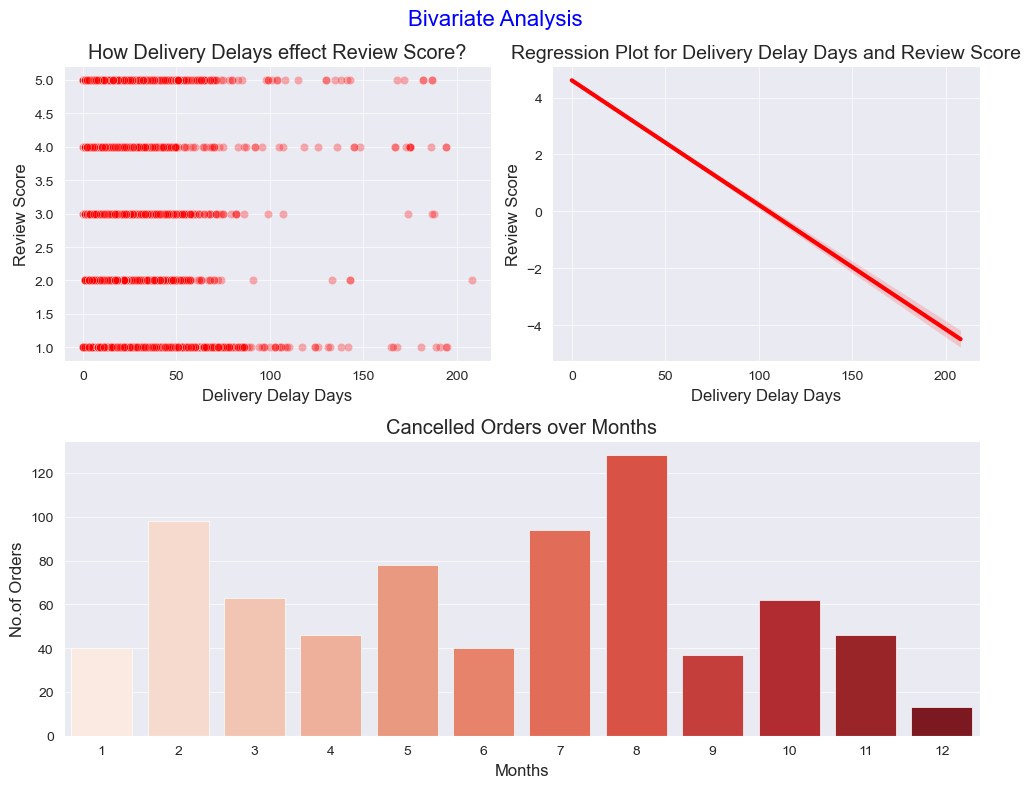

In [80]:
fig = plt.figure(figsize=(10,8))
gs = fig.add_gridspec(2,2)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1]) 
ax3 = fig.add_subplot(gs[1,:])

plt.suptitle("Bivariate Analysis", color="b", fontsize=16)

sns.scatterplot(data=order_full, x="delivey_time_days", y="review_score", alpha=0.3, color="red", ax=ax1);
ax1.set_title("How Delivery Delays effect Review Score?")
ax1.set_xlabel("Delivery Delay Days")
ax1.set_ylabel("Review Score") 

sns.regplot(data=order_full, x="delivey_time_days", y="review_score", scatter=False,
           color="red", ax= ax2);
ax2.set_title("Regression Plot for Delivery Delay Days and Review Score", fontsize=14)
ax2.set_xlabel("Delivery Delay Days")
ax2.set_ylabel("Review Score") 

sns.countplot(data=cancelled_orders, x="pur_month", palette="Reds", ax=ax3);
ax3.set_title("Cancelled Orders over Months")
ax3.set_xlabel("Months")
ax3.set_ylabel("No.of Orders")

plt.tight_layout()
plt.show();

In [81]:
product_cat_revenue = order_full.groupby("product_category_name_english")["payment_value"].sum().sort_values(ascending=False)
product_cat_revenue[:5]

product_category_name_english
bed_bath_table          1684871.6200
health_beauty           1627081.4400
computers_accessories   1569809.8800
furniture_decor         1411793.6800
watches_gifts           1409970.1000
Name: payment_value, dtype: float64

In [82]:
product_cat_review = order_full.groupby("product_category_name_english")["review_score"].mean().sort_values(ascending=False)
product_cat_review[:5]

product_category_name_english
cds_dvds_musicals           4.6429
fashion_childrens_clothes   4.5000
books_general_interest      4.4380
flowers                     4.4194
costruction_tools_tools     4.4158
Name: review_score, dtype: float64

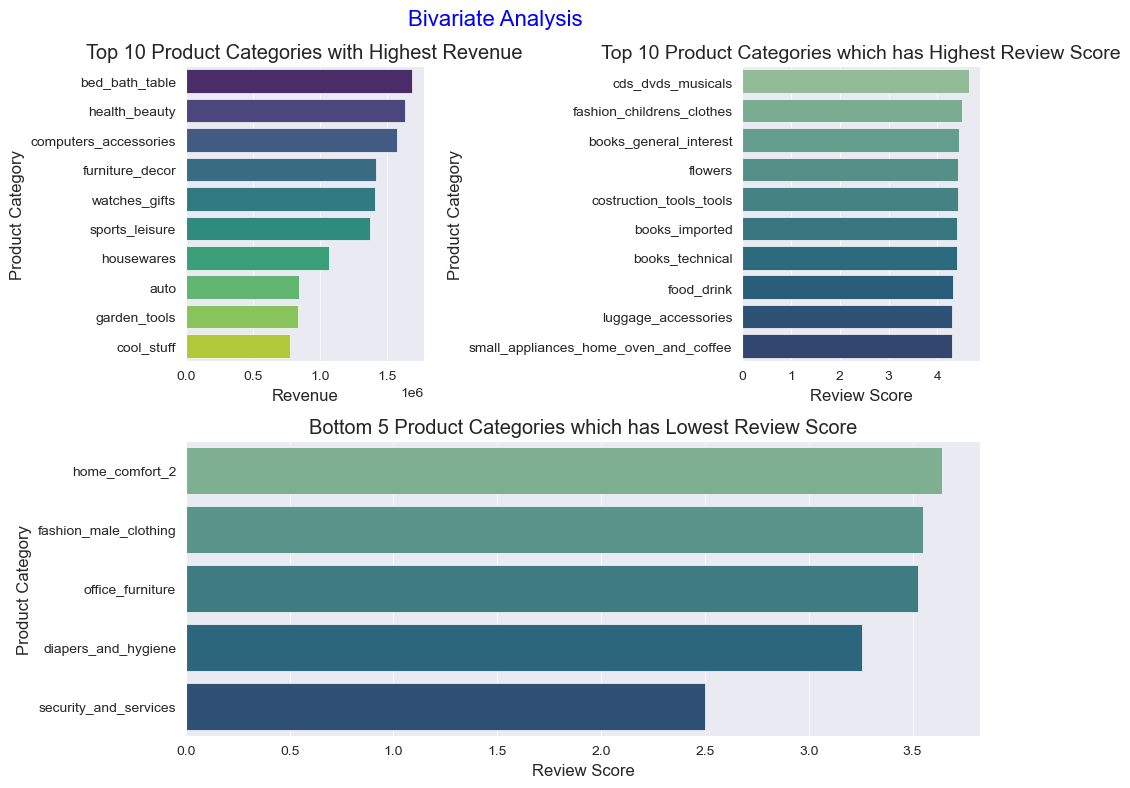

In [83]:
fig = plt.figure(figsize=(10,8))
gs = fig.add_gridspec(2,2)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1]) 
ax3 = fig.add_subplot(gs[1,:])

plt.suptitle("Bivariate Analysis", color="b", fontsize=16)

sns.barplot(x=product_cat_revenue.head(10).values,
            y=product_cat_revenue.head(10).index,
            palette="viridis", ax=ax1);
ax1.set_title("Top 10 Product Categories with Highest Revenue")
ax1.set_xlabel("Revenue")
ax1.set_ylabel("Product Category") 

sns.barplot(x=product_cat_review.head(10).values,
            y=product_cat_review.head(10).index,
            palette="crest", ax=ax2);
ax2.set_title("Top 10 Product Categories which has Highest Review Score", fontsize=14)
ax2.set_xlabel("Review Score")
ax2.set_ylabel("Product Category") 

sns.barplot(x=product_cat_review.tail(5).values,
            y=product_cat_review.tail(5).index,
            palette="crest", ax=ax3);
ax3.set_title("Bottom 5 Product Categories which has Lowest Review Score")
ax3.set_xlabel("Review Score")
ax3.set_ylabel("Product Category")

plt.tight_layout()
plt.show();

### Multivaraiate

In [84]:
state_monthly_sales = (
    order_full.groupby(["customer_state", "pur_month"])["payment_value"]
    .sum()
    .reset_index()
)

In [85]:
sales_pivot = state_monthly_sales.pivot_table(
    index="customer_state", 
    columns="pur_month", 
    values="payment_value", 
    fill_value=0
) 

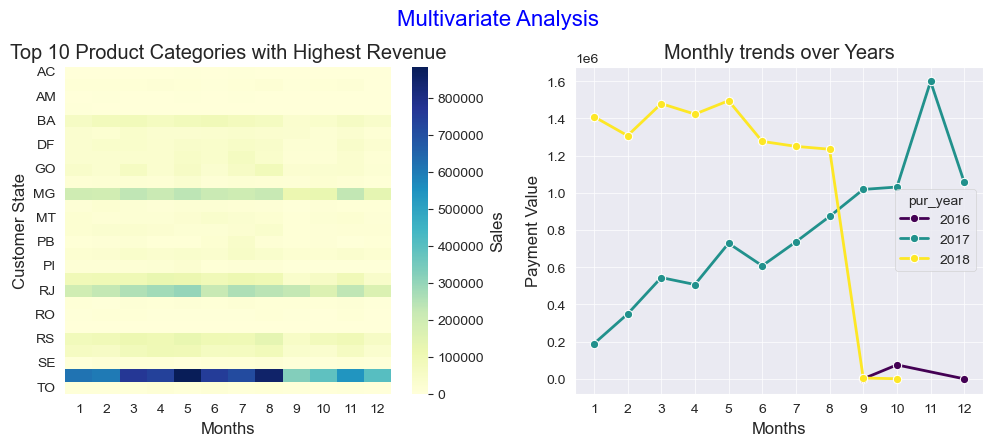

In [86]:
fig = plt.figure(figsize=(10,8))
gs = fig.add_gridspec(2,2)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1]) 

plt.suptitle("Multivariate Analysis", color="b", fontsize=16)

sns.heatmap(sales_pivot, cmap="YlGnBu", cbar_kws={'label': 'Sales'}, ax=ax1);
ax1.set_title("Top 10 Product Categories with Highest Revenue")
ax1.set_xlabel("Months")
ax1.set_ylabel("Customer State") 

sns.lineplot(data=monthy_trend, x="pur_month", y="payment_value", hue="pur_year", marker="o", palette="viridis", ax=ax2);
ax2.set_title("Monthly trends over Years")
ax2.set_xlabel("Months")
ax2.set_ylabel("Payment Value")  
ax2.set_xticks(range(1,13))

plt.tight_layout()
plt.show();

In [87]:
customer_orders = order_full.groupby("customer_unique_id")["order_purchase_timestamp"].count().reset_index()
customer_orders.columns = ["customer_unique_id", "order_count"] 

order_full = order_full.merge(customer_orders, on="customer_unique_id", how="left") 

order_full["repeat_purchase"] = order_full["order_count"] > 1 

In [88]:
repeat_rates = (
    order_full.groupby("delivery_status")["repeat_purchase"]
    .mean()
    .reset_index()
) 

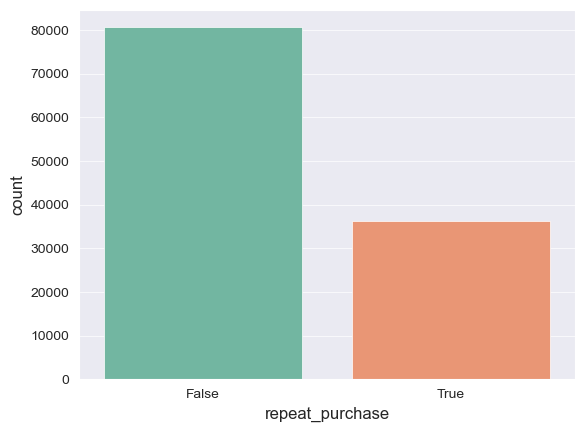

In [89]:
sns.countplot(x="repeat_purchase", data=order_full, palette="Set2");

In [90]:
# Delivery delay (difference from estimated date)
order_full["delay_days"] = (
    order_full["order_delivered_customer_date"] - order_full["order_estimated_delivery_date"]
).dt.days  
order_full["delay_days"].fillna(order_full['delay_days'].max(), inplace=True)

In [91]:
order_full["same_state"] = order_full["customer_state"] == order_full["seller_state"]

In [92]:
delay_summary = (
    order_full.groupby(["product_category_name_english", "same_state"])["delay_days"]
    .mean()
    .reset_index()
    .sort_values("delay_days", ascending=False)
)

print(delay_summary.head(10))

             product_category_name_english  same_state  delay_days
58               fashion_childrens_clothes       False     18.5000
51                            dvds_blu_ray        True      9.1818
82       furniture_mattress_and_upholstery       False      7.7647
128  small_appliances_home_oven_and_coffee        True      7.3810
18                          books_imported       False      5.3913
61                   fashion_male_clothing        True      5.0750
39               construction_tools_safety        True      4.4483
55                  fashio_female_clothing        True      4.1154
113                    musical_instruments        True      4.0138
46                     diapers_and_hygiene       False      2.8889


<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='same_state', ylabel='product_category_name_english'>

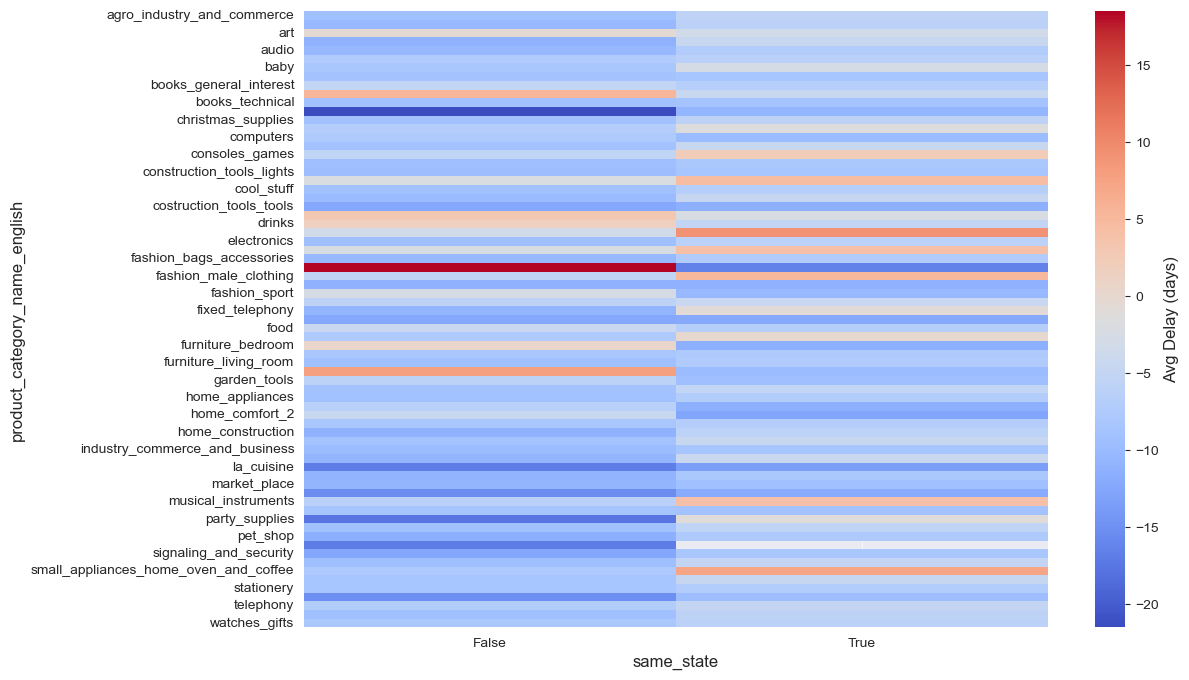

In [93]:
pivot_delay = order_full.pivot_table(
    index="product_category_name_english",
    columns="same_state",
    values="delay_days",
    aggfunc="mean"
) 

plt.figure(figsize=(12,8))
sns.heatmap(pivot_delay, cmap="coolwarm", fmt=".1f", cbar_kws={'label': 'Avg Delay (days)'})


In [94]:
state_customers = order_full.groupby('customer_state').agg(
    count=("customer_state", "count")
).reset_index()
state_customers.head()

,customer_state,count
0,AC,92
1,AL,456
2,AM,171
3,AP,84
4,BA,4018


In [95]:
state_reviews = order_full.groupby('customer_state').agg(
    review_score=("review_score", "mean")
).reset_index() 

state_reviews.head()

,customer_state,review_score
0,AC,4.0978
1,AL,3.7439
2,AM,4.1006
3,AP,4.2410
4,BA,3.8042


In [96]:
def bucket_delay(days):
    if pd.isna(days):
        return 'Not Delivered'
    elif days < -3:
        return 'Very Early'
    elif days < 0:
        return 'Early'
    elif days == 0:
        return 'On Time'
    elif days <= 3:
        return 'Slightly Late'
    elif days <= 7:
        return 'Late'
    else:
        return 'Very Late'

order_full['delay_bucket'] = order_full['delay_days'].apply(bucket_delay)

avg_reviews = order_full.groupby('delay_bucket')['review_score'].mean().reset_index()

bucket_order = ['Very Early', 'Early', 'On Time', 'Slightly Late', 'Late', 'Very Late', 'Not Delivered']

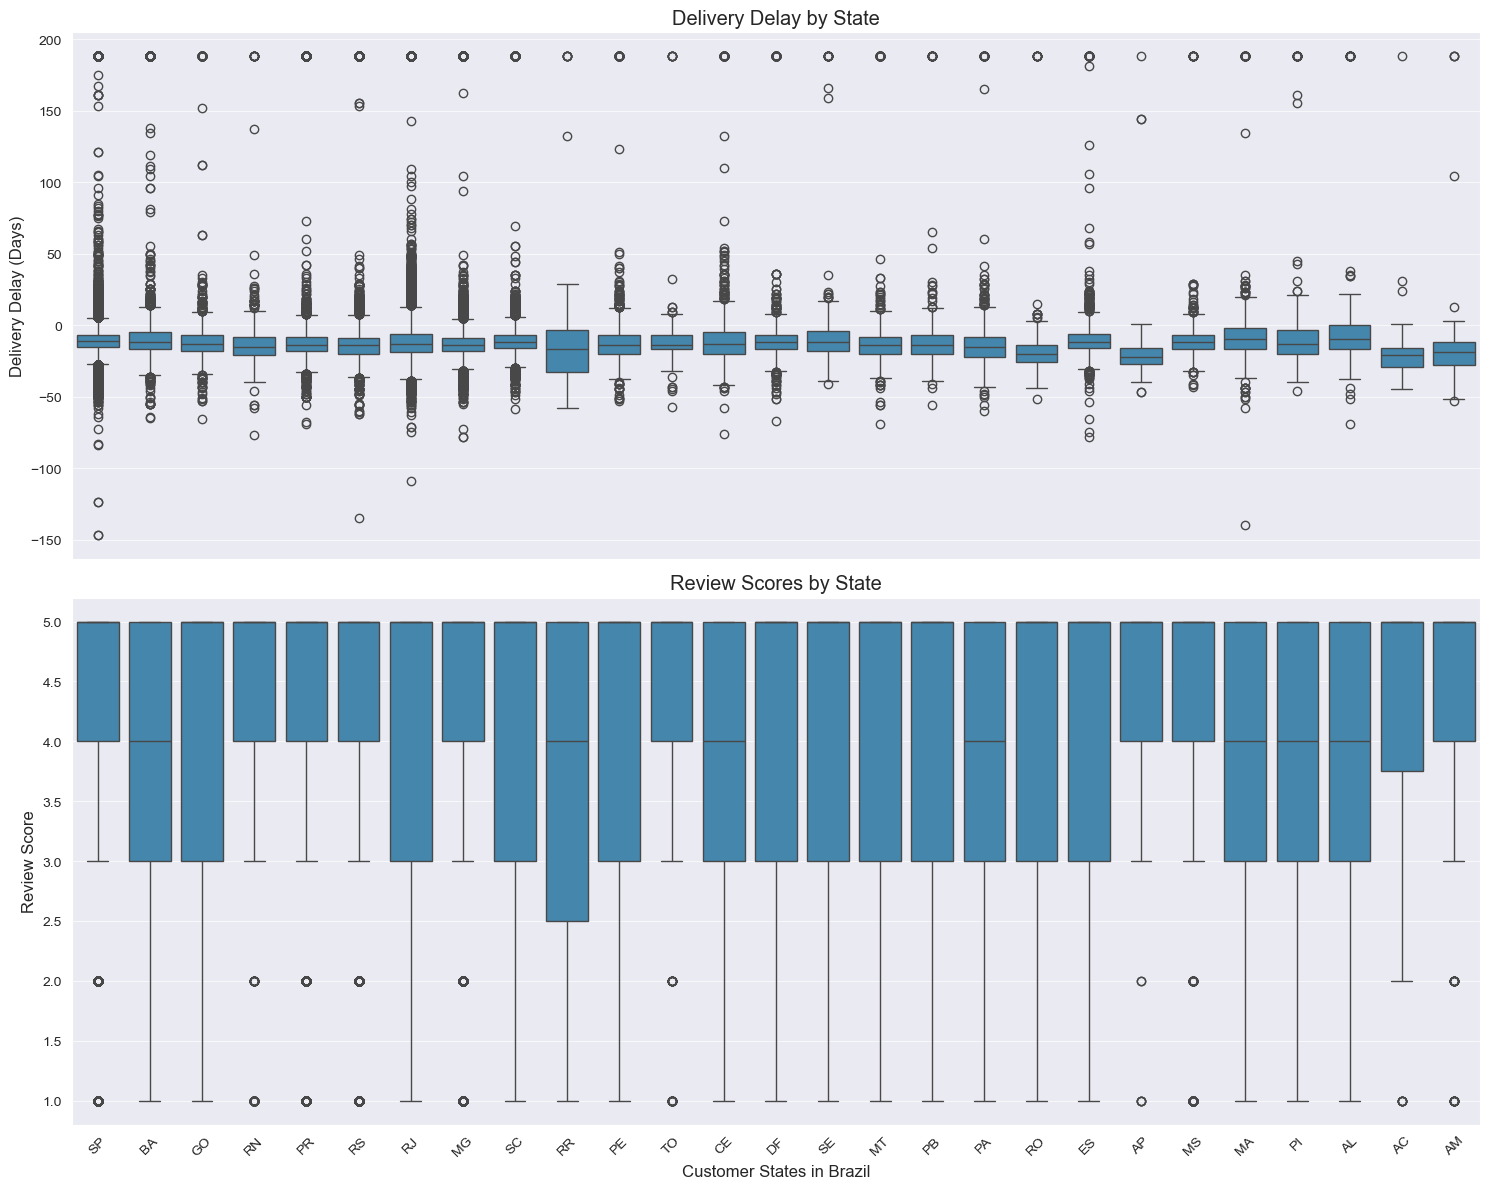

In [97]:
fig, axes = plt.subplots(2, 1, figsize=(15, 12))
sns.boxplot(data=order_full, x='customer_state', y='delay_days', ax=axes[0])
# axes[0].tick_params(axis="x", rotation=45)
axes[0].xaxis.set_visible(False)
axes[0].set_title('Delivery Delay by State')
axes[0].set_xlabel("Customer States in Brazil")
axes[0].set_ylabel("Delivery Delay (Days)")

sns.boxplot(data=order_full, x='customer_state', y='review_score', ax=axes[1])
axes[1].tick_params(axis="x", rotation=45)
# axes[0].xaxis.set_visible(False)
axes[1].set_title('Review Scores by State')
axes[1].set_xlabel("Customer States in Brazil")
axes[1].set_ylabel("Review Score")


plt.tight_layout()
plt.show();

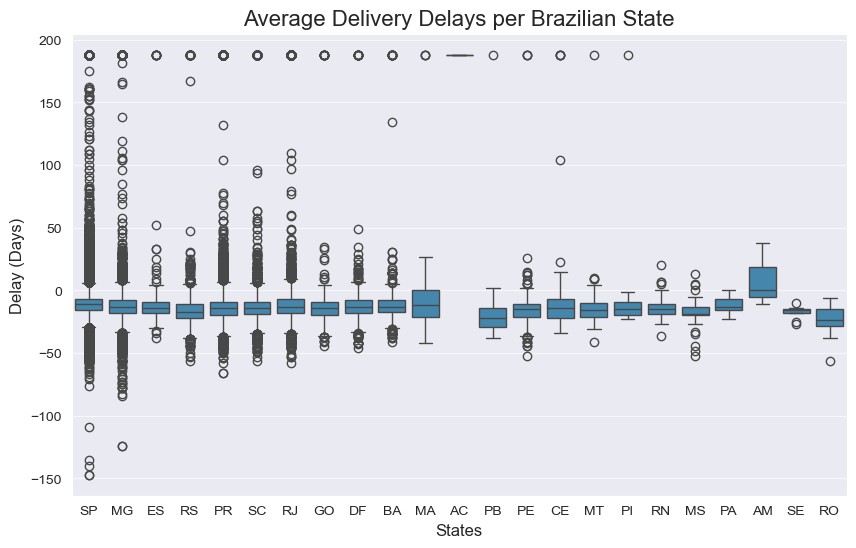

In [98]:
plt.figure(figsize=(10,6))
sns.boxplot(data=order_full, x="seller_state", y="delay_days")
plt.title('Average Delivery Delays per Brazilian State', fontsize=16)
plt.xlabel('States')
plt.ylabel('Delay (Days)');